In [7]:
###Time Series Analysis

In [8]:
import pandas as pd
data = pd.read_csv("../data/fremont-bridge.csv", index_col= 'Date', parse_dates=True)
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [9]:
data.dropna().describe()

,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


In [11]:
data.columns = ["West", "East", "Total"]
data["Total"] = data["West"] + data["East"] 
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,13.0,4.0,17.0
2012-10-03 01:00:00,10.0,4.0,14.0
2012-10-03 02:00:00,2.0,1.0,3.0
2012-10-03 03:00:00,5.0,2.0,7.0
2012-10-03 04:00:00,7.0,6.0,13.0


In [12]:
data.dropna().describe()

,West,East,Total
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,167.514187
std,145.686289,67.739036,208.448565
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,22.000000
50%,62.000000,29.000000,91.000000
75%,150.000000,71.000000,221.000000
max,1097.000000,698.000000,1569.000000


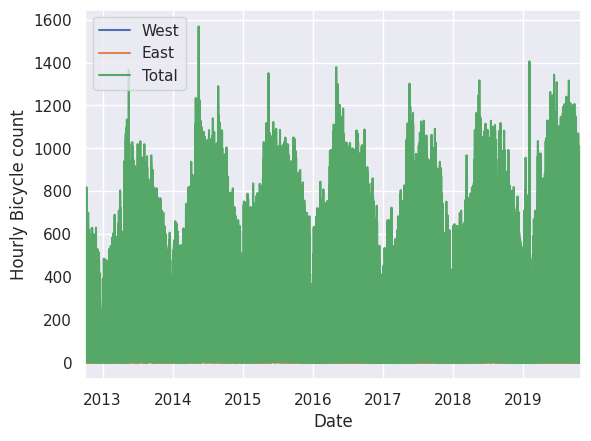

In [13]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

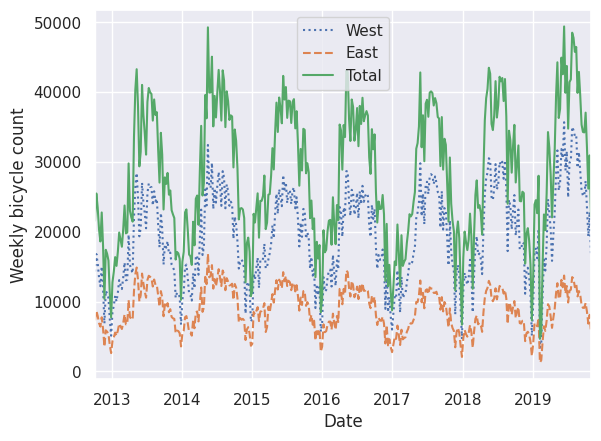

In [14]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

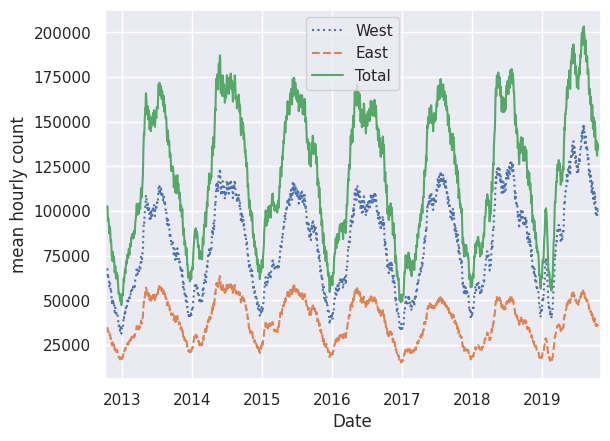

In [15]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

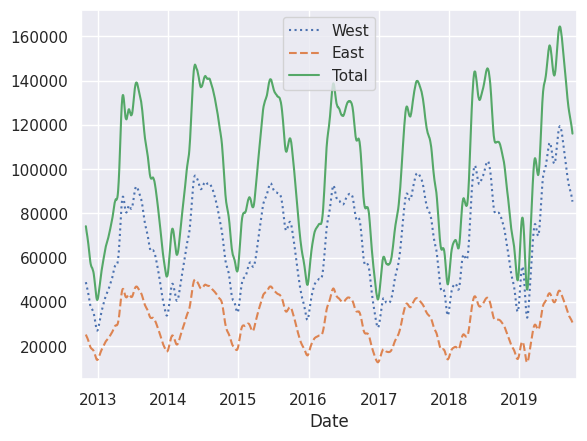

In [16]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

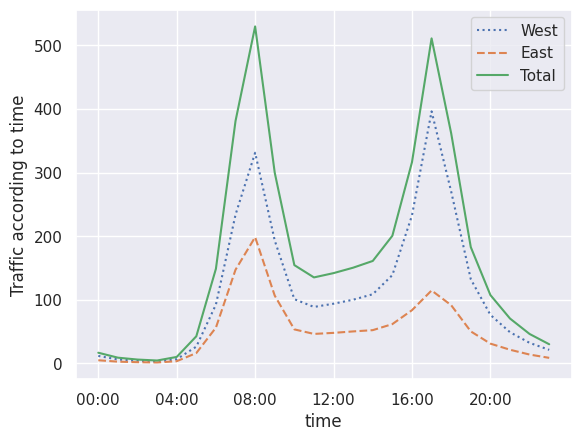

In [17]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()